# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

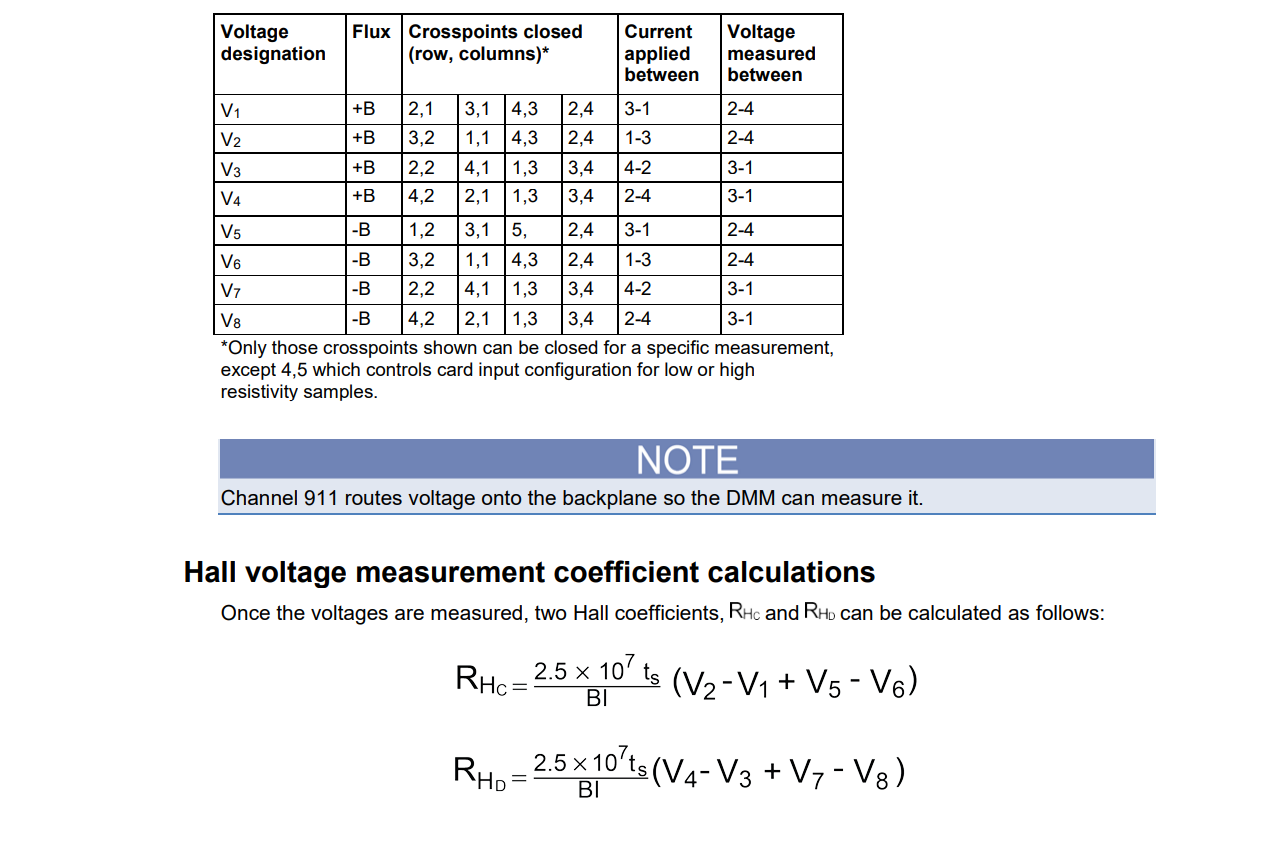

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [77]:
truncate = True # True it contains data from O to Bmax
path = "C:\\users\\Admin\\Desktop\\Analysis\\Plots\\LCMO_PLD2\\HALL"
filename = 'LCMO_PLD2_200K_HALL_+5T_to_-5T.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V2", "V1", "V4", "V3",'Rel_value','multiplier'])
df


,I,B,T,V2,V1,V4,V3,Rel_value,multiplier
0,0.000001,50000.169141,200.229291,57724.03023,-186180.89738,-113375.74708,98594.81242,-0.003397,1000000.0
1,0.000001,49000.258594,200.350134,58592.08667,-189974.53992,-112185.54810,100150.13331,-0.003562,1000000.0
2,0.000001,48000.435547,200.368237,56945.56440,-194145.45696,-110043.08366,101825.57131,-0.003730,1000000.0
3,0.000001,47000.349609,200.361129,57129.64577,-198670.76309,-107718.21822,103447.10900,-0.003746,1000000.0
4,0.000001,46000.368945,200.313277,56339.77587,-202965.36426,-105934.80360,105404.67265,-0.003792,1000000.0
...,...,...,...,...,...,...,...,...,...
197,0.000001,46000.394922,199.995470,58089.23960,-203339.23898,-109742.60269,107554.38698,-0.003631,1000000.0
198,0.000001,47000.401367,199.994281,58471.90753,-199686.89109,-111623.80430,105802.77570,-0.003787,1000000.0
199,0.000001,48000.488086,200.003055,58638.56289,-195472.29693,-112954.61623,103648.52128,-0.003468,1000000.0
200,0.000001,49000.291406,200.000923,59203.12242,-190880.56807,-114138.55221,102422.90028,-0.003583,1000000.0


### Converting B to integer B

In [78]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [79]:
df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,50000.169141,50000,200.229291,-186180.89738,57724.03023,98594.81242,-113375.74708,-0.003397,1000000.0
1,0.000001,49000.258594,49000,200.350134,-189974.53992,58592.08667,100150.13331,-112185.54810,-0.003562,1000000.0
2,0.000001,48000.435547,48000,200.368237,-194145.45696,56945.56440,101825.57131,-110043.08366,-0.003730,1000000.0
3,0.000001,47000.349609,47000,200.361129,-198670.76309,57129.64577,103447.10900,-107718.21822,-0.003746,1000000.0
4,0.000001,46000.368945,46000,200.313277,-202965.36426,56339.77587,105404.67265,-105934.80360,-0.003792,1000000.0


In [80]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] =- df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

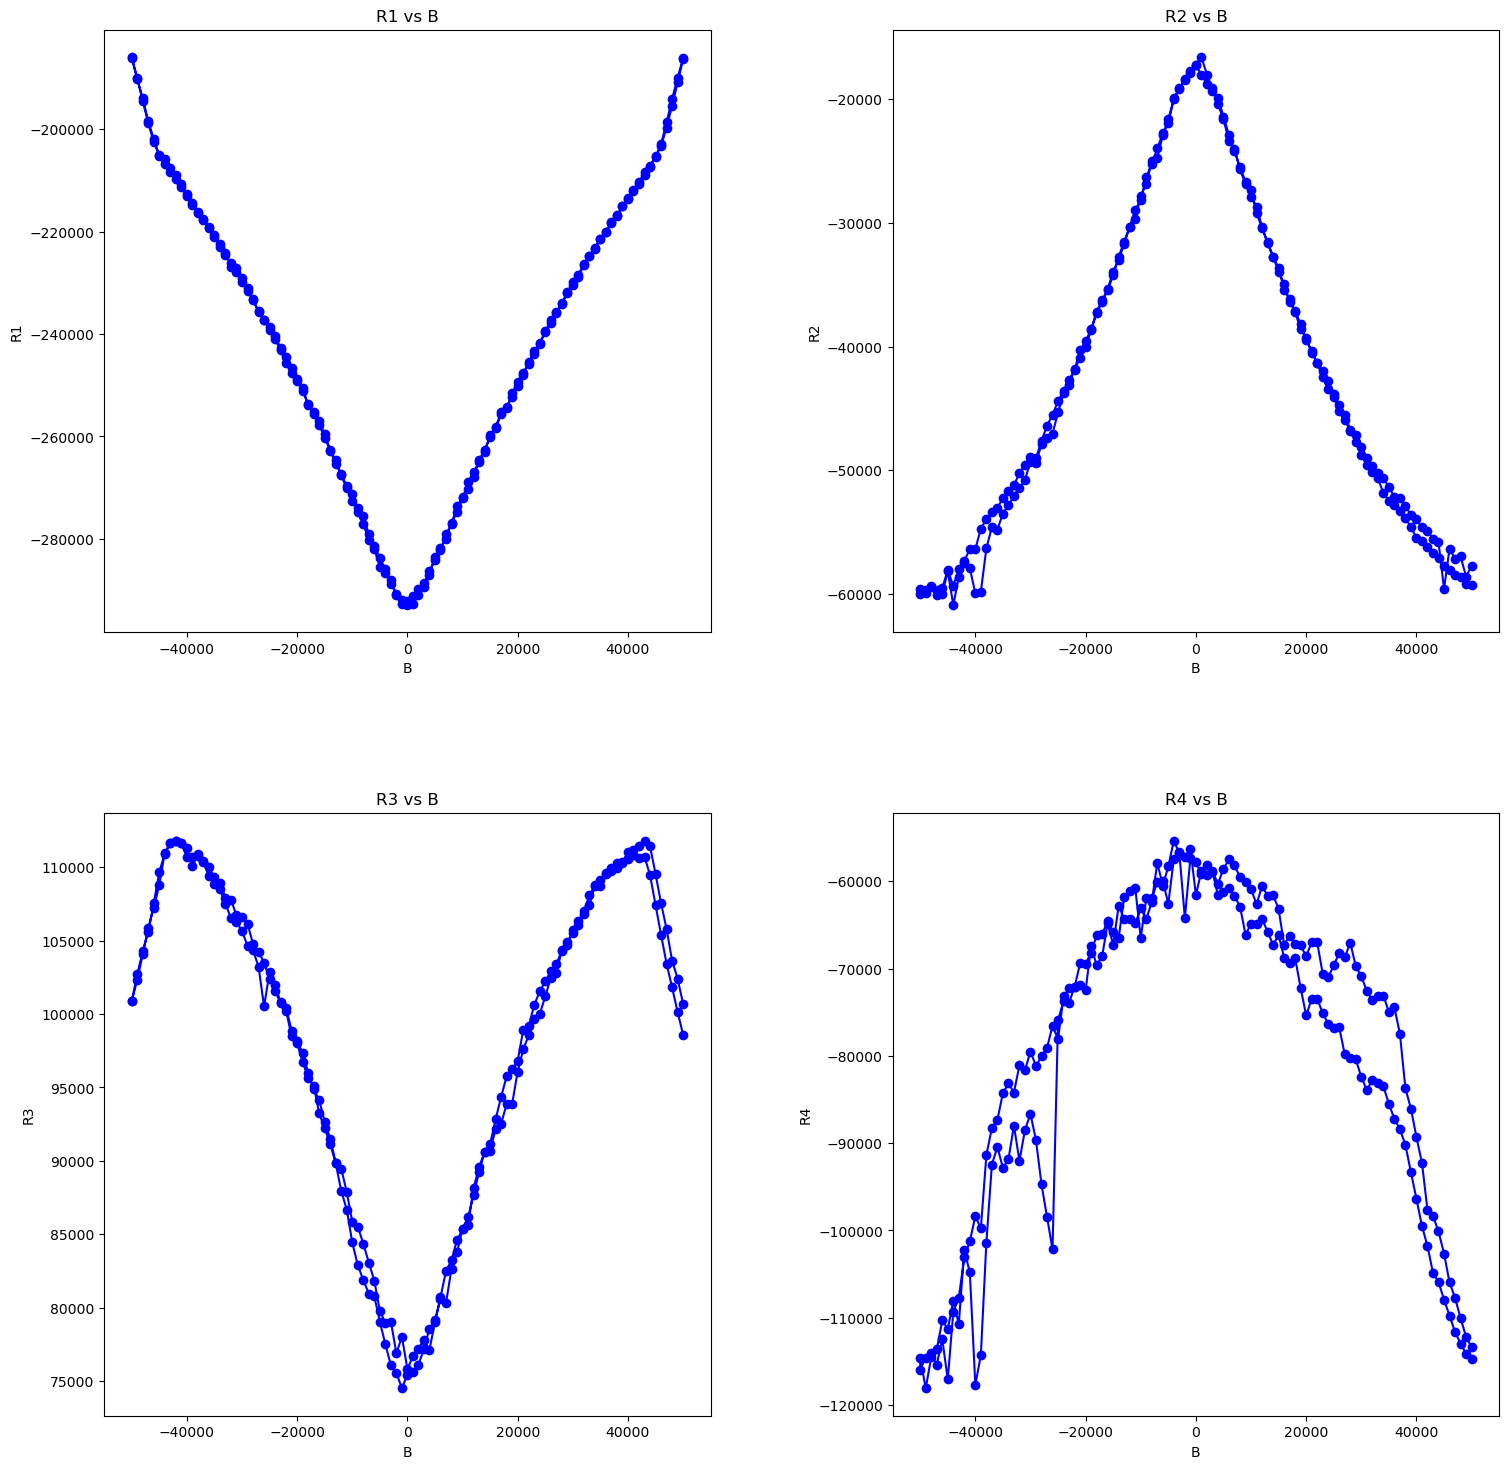

In [81]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [82]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

0


In [83]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = -df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

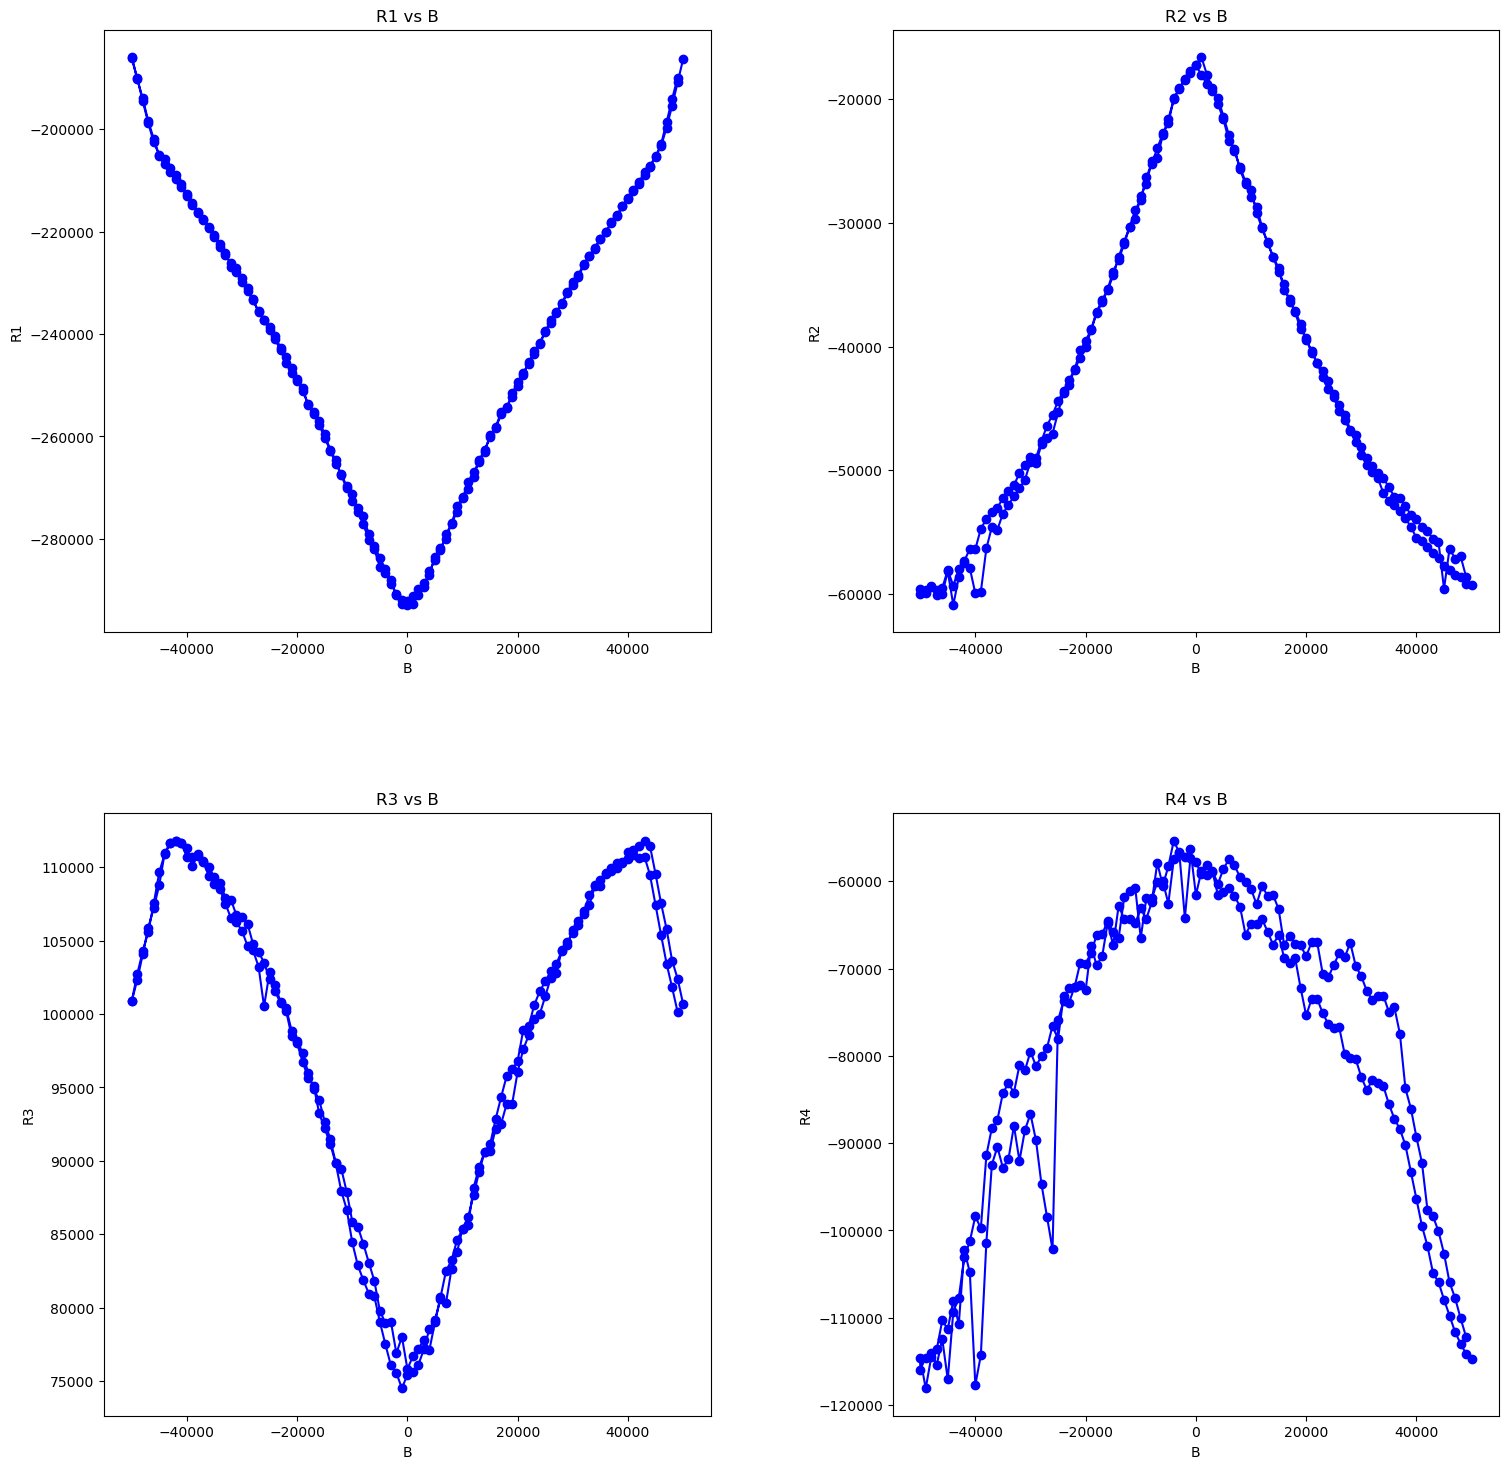

In [84]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [85]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

50000 -50000


In [86]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

99

In [87]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [88]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.000001,49000.258594,49000,200.350134,-189974.53992,58592.08667,100150.13331,-112185.54810,-0.003562,1000000.0
1,0.000001,48000.435547,48000,200.368237,-194145.45696,56945.56440,101825.57131,-110043.08366,-0.003730,1000000.0
2,0.000001,47000.349609,47000,200.361129,-198670.76309,57129.64577,103447.10900,-107718.21822,-0.003746,1000000.0
3,0.000001,46000.368945,46000,200.313277,-202965.36426,56339.77587,105404.67265,-105934.80360,-0.003792,1000000.0
4,0.000001,45000.353320,45000,200.259122,-205419.58325,59576.98970,107439.43484,-102644.63022,-0.003685,1000000.0


In [89]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
100,0.000001,-50000.513672,-50000,199.994921,-186086.52121,59611.01347,100880.04734,-114647.06846,-0.003543,1000000.0
101,0.000001,-49000.231445,-49000,199.995790,-190249.92277,59694.80549,102721.48250,-118086.76310,-0.003520,1000000.0
102,0.000001,-48000.472266,-48000,199.995821,-193980.99122,59352.37528,104279.26006,-114520.89173,-0.003576,1000000.0
103,0.000001,-47000.420508,-47000,199.994616,-198470.98790,59655.95594,105611.07308,-113632.23262,-0.003610,1000000.0
104,0.000001,-46000.313477,-46000,199.992799,-201924.59318,59979.79392,107547.92692,-110310.75525,-0.003748,1000000.0


In [90]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [91]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,49000,200.350134,-189974.53992,58592.08667,100150.13331,-112185.54810,-190249.92277,59694.80549,102721.48250,-118086.76310,1000000.0
1,0.000001,48000,200.368237,-194145.45696,56945.56440,101825.57131,-110043.08366,-193980.99122,59352.37528,104279.26006,-114520.89173,1000000.0
2,0.000001,47000,200.361129,-198670.76309,57129.64577,103447.10900,-107718.21822,-198470.98790,59655.95594,105611.07308,-113632.23262,1000000.0
3,0.000001,46000,200.313277,-202965.36426,56339.77587,105404.67265,-105934.80360,-201924.59318,59979.79392,107547.92692,-110310.75525,1000000.0
4,0.000001,45000,200.259122,-205419.58325,59576.98970,107439.43484,-102644.63022,-205183.67874,58170.62496,109672.46516,-111295.87368,1000000.0


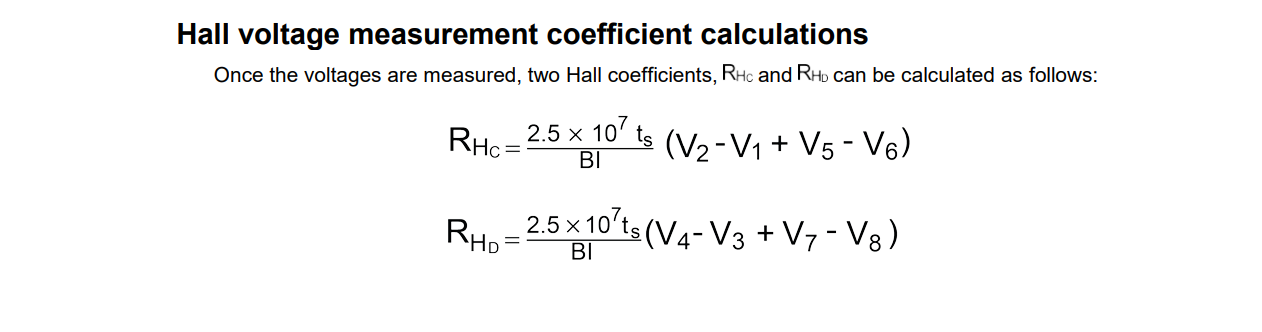
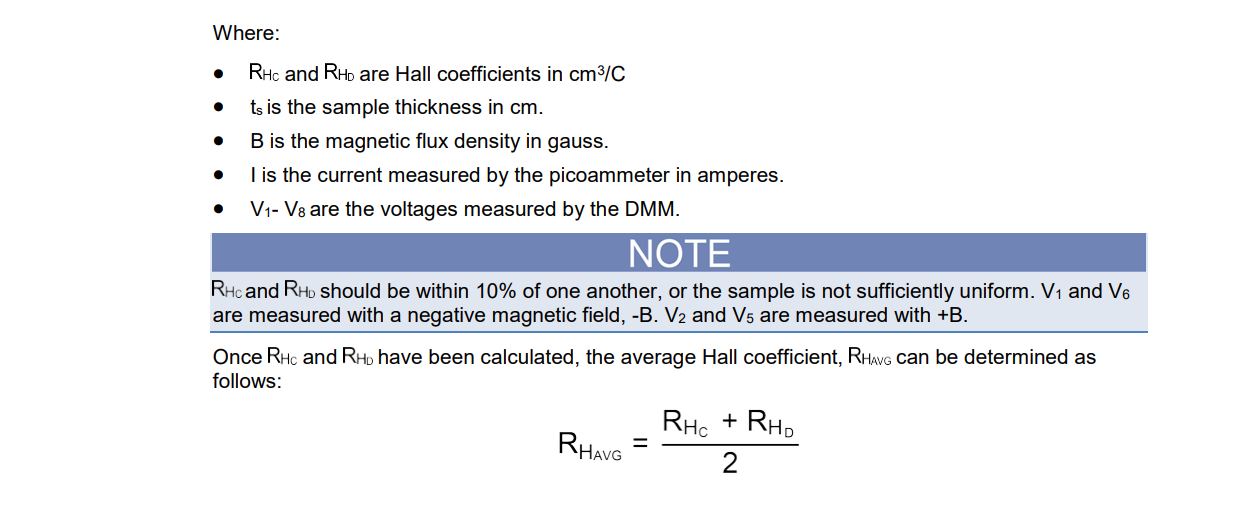

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [92]:
data_dec['RHc'] = (data_dec['V2'] - data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (data_dec['V4'] - data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

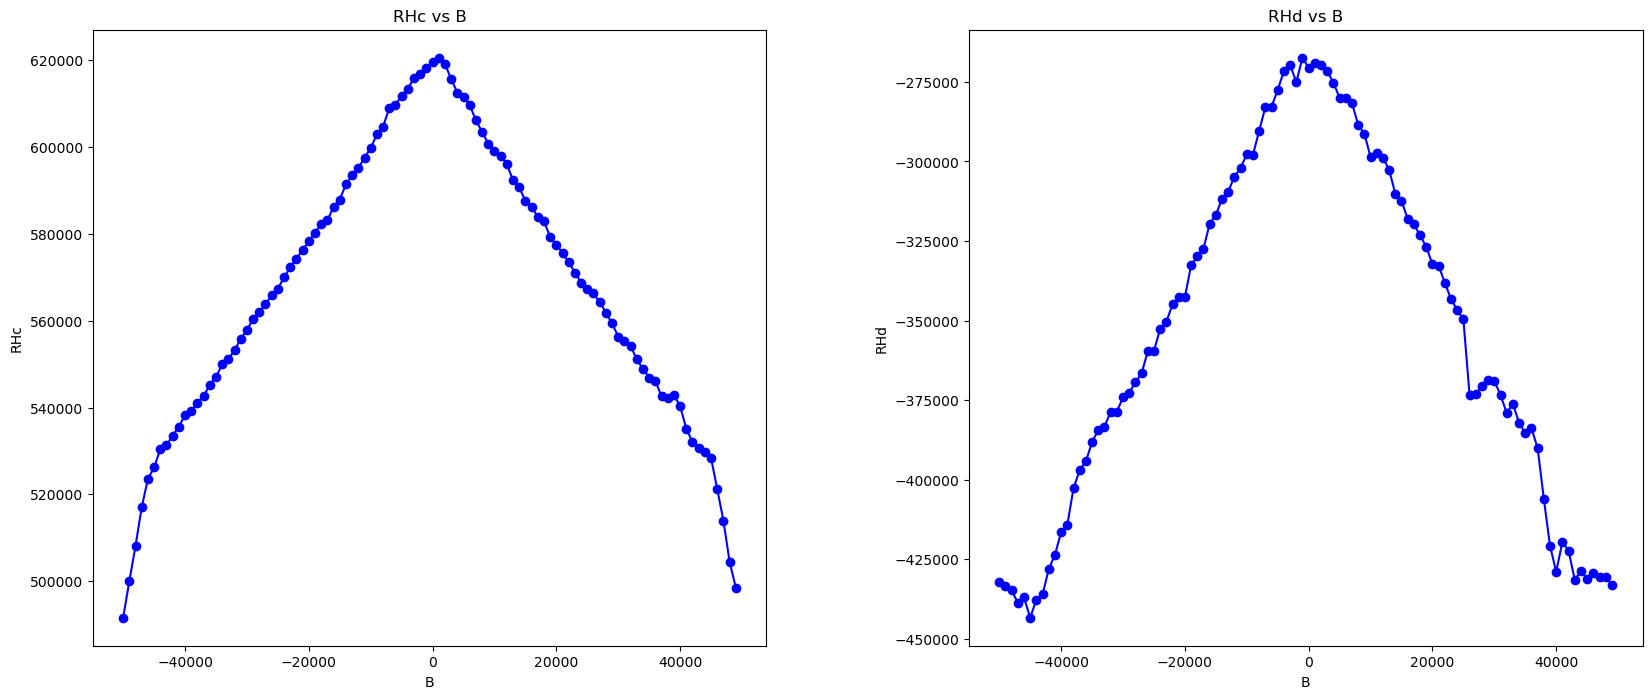

In [93]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

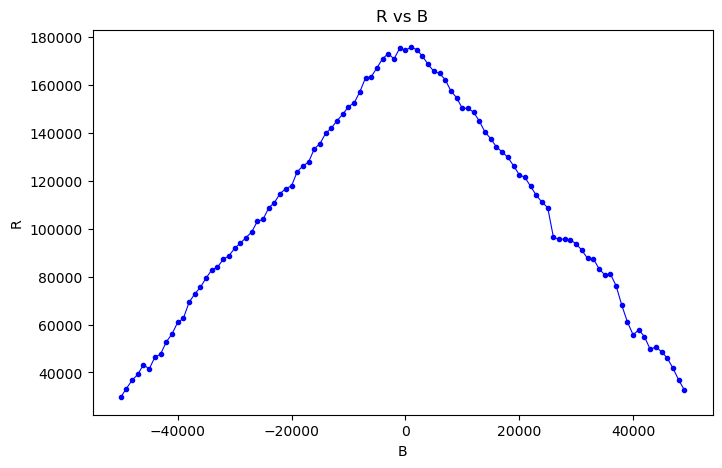

In [94]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [95]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.000001,-49000,199.995790,-190249.92277,59694.80549,102721.48250,-118086.76310,-189974.53992,58592.08667,100150.13331,-112185.54810,1000000.0
1,0.000001,-48000,199.995821,-193980.99122,59352.37528,104279.26006,-114520.89173,-194145.45696,56945.56440,101825.57131,-110043.08366,1000000.0
2,0.000001,-47000,199.994616,-198470.98790,59655.95594,105611.07308,-113632.23262,-198670.76309,57129.64577,103447.10900,-107718.21822,1000000.0
3,0.000001,-46000,199.992799,-201924.59318,59979.79392,107547.92692,-110310.75525,-202965.36426,56339.77587,105404.67265,-105934.80360,1000000.0
4,0.000001,-45000,199.992821,-205183.67874,58170.62496,109672.46516,-111295.87368,-205419.58325,59576.98970,107439.43484,-102644.63022,1000000.0


### Hall resistance calculation

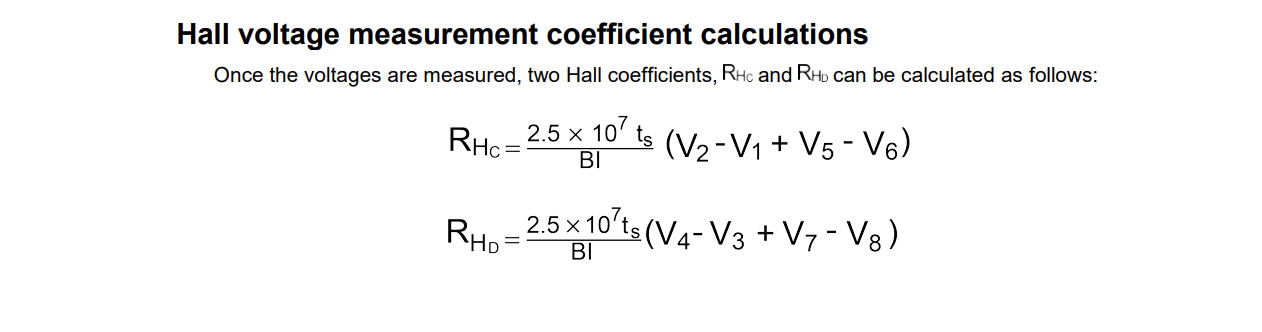

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [96]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (data_inc['V4'] - data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2
data_inc['R']

0     32683.713920
1     36877.790550
2     41759.359890
3     46005.684405
4     48649.236375
          ...     
95    43276.254245
96    39165.666540
97    36725.330540
98    33280.931110
99    29644.760220
Name: R, Length: 100, dtype: float64

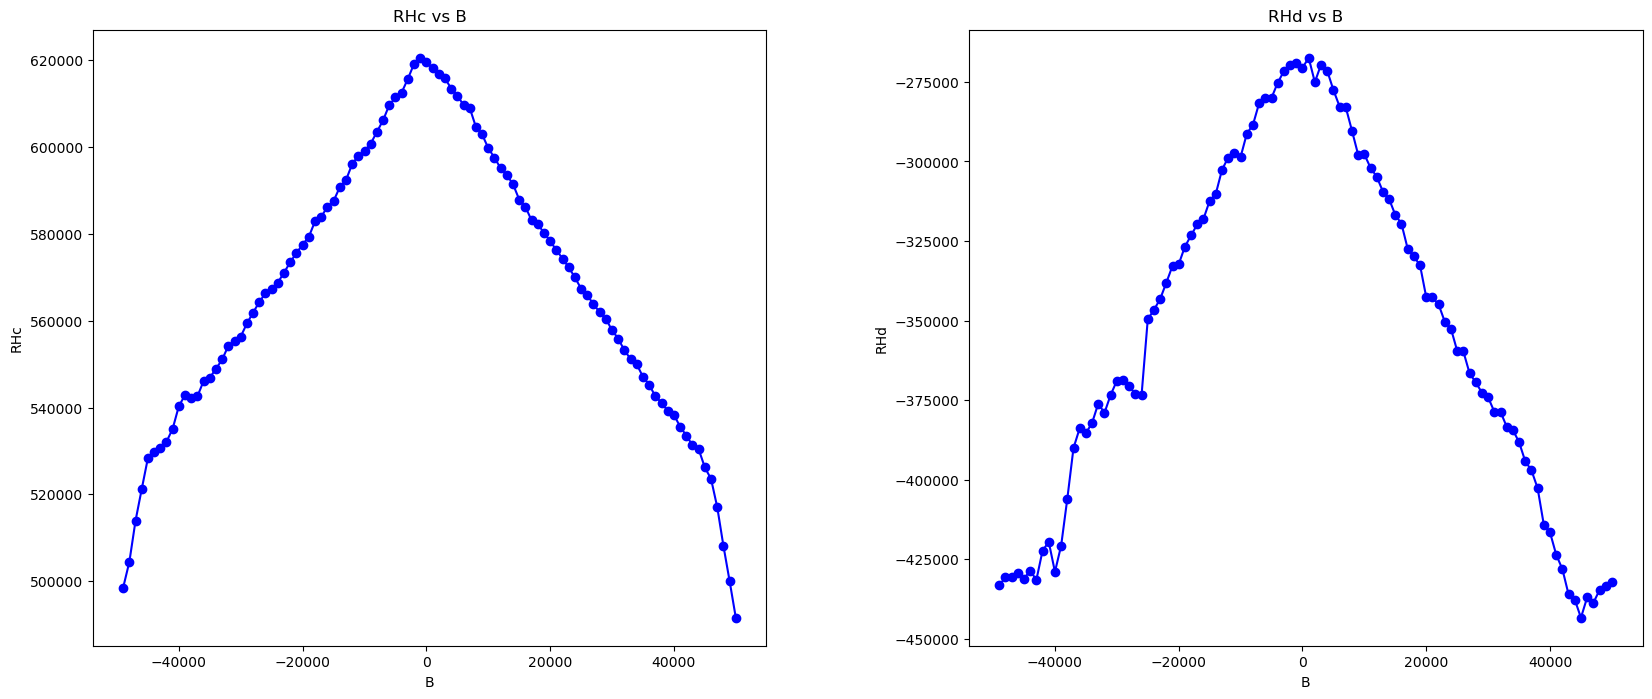

In [97]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

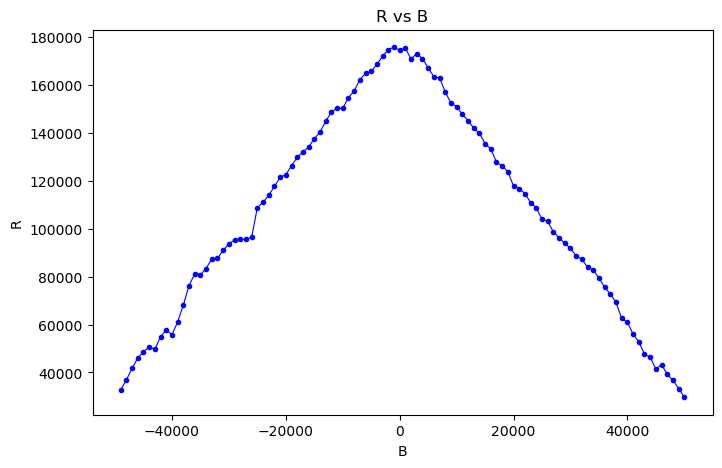

In [98]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

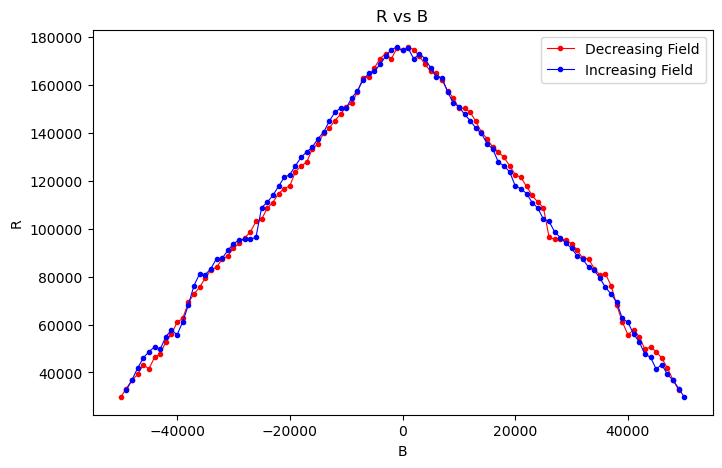

In [99]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [100]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')